<a href="https://colab.research.google.com/github/matthewbegun/MXN500/blob/main/MXN500_2024_WOR_05_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Special Distributions


## About this workshop

This workshop explores the use of the normal distribution to model the height of people.

At the end, there is an extension exercise about looking at how closely our data follow a normal distribution. If you don't cover it this week, you'll encounter it later in the semester in the context of model diagnostics.

We assume you can get started in R with ease and that you've done the lecture and lab for this week and all previous weeks.

* Assumed skills
    - Manipulating data objects in R
    - Calculating and interpreting summary statistics
    - Writing and executing functions in R
    - Visualising results with ggplot2
* Learning objectives
* Professional skills
    - Visualising results

A reminder of expectations in the workshop:

* Keep a record of the work being completed, both the R script and this document
* Allow everyone a chance to participate in the workshop
* All opinions are valued provided they do not harm others
* Everyone is expected to help out with completing the work, learning seldom occurs by watching someone else do maths
* Shuffle the group around so that someone different is controlling R

## Set up environment


In [ ]:
# Installs - only run once
install.packages("tidyverse")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [62]:
# import tidyverse
library(tidyverse)
# ggplot global options
options(repr.plot.width=6, repr.plot.height=2)

# Activity 1 -- The Quantitative Model





The normal distribution is a probability distribution which can be used to model a continous random variable, such as the height of humans.

If a random variable, $X$, is distributed according to a normal distribution, we can write this as

$$
X \sim N \left( \mu, \sigma^2 \right)
$$

The normal distribution has the form

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2}.
$$

**Exercise:** What are the parameters of this model?

**Answer:** The parameters of this model are the mean, $\mu$, and the variance, $\sigma^2$.





**Exercise:** For what values of $x$ is $f(x)$ defined?

**Answer:** $f(x)$ is defined for all $-\infty \lt x \lt \infty$.



**Exercise:** Are there any values of $x$ which do not make sense for us to include for height?



**Answer:** It doesn’t make sense to have negative heights. If we have a greater deal of physiological knowledge we might be able to put a more specific bound on reasonable heights.

**Room discussion:** Have your group spokesperson briefly describe which values of height are reasonable and why.

Typical heights (in cm) ranged from 150m to 188cm; the tallest person ever is 288cm; negative or 0 heights don't make sense

# Activity 2 -- Exploratory Analysis

If we don't know the values of $\mu$ and $\sigma$ we must estimate them from our data in order to use our normal distribution model. In this section, we will use the normal distribution to model the variability we expect to see in height.

## Visualisation

**Exercise:** Make a new script with a comment describing the workshop, and load in the data.


**Answer:**

In [63]:
# MXN500 Workshop 5
## Activity 2
library(tidyverse)
df <- read_csv('HeightWeight.csv')
spec(df)
dim(df)

Rows: 200 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): Index, Height, Weight

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cols(
  Index = col_double(),
  Height = col_double(),
  Weight = col_double()
)

[1] 200   3


Before we get into modelling the variation in the data, it is useful to understand how our variable is distributed; otherwise we may not be making sensible choices about how to model the variation.

**Exercise:** Make a histogram that shows the variability in height, with the density on the $y$ axis.

**Answer:**

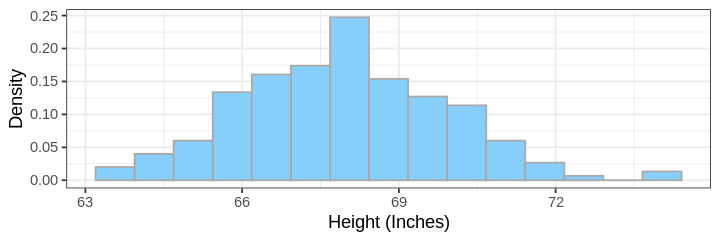

In [68]:
ggplot(data = df, aes(x = Height)) +
  geom_histogram(aes(y = after_stat(density)),
                 color="darkgrey",
                 fill = "lightskyblue",
                 bins = 15) +
  labs(x = "Height (Inches)", y = "Density") +
  theme_bw()

**Exercise:** Calculate the mean and standard deviation of height and make a table below containing these numbers

**Answer:**

In [66]:
# can get the values directly with mean(df$Height) and sd(df$Height);
# but we want a table
summarise(df, "Mean" = mean(Height), "Standard Deviation" = sd(Height))

Mean,Standard Deviation
<dbl>,<dbl>
67.9498,1.940363


**Exercise:** Using `stat_function()` and `dnorm()`, add a normal distribution with your calculated mean and standard deviations to your histogram.

**Answer:**

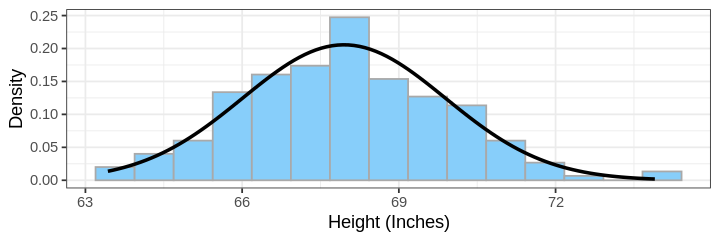

In [69]:
ggplot(data = df, aes(x = Height)) +
  geom_histogram(aes(y = after_stat(density)),
                 color="darkgrey",
                 fill = "lightskyblue",
                 bins = 15) +
  labs(x = "Height (Inches)", y = "Density") +
  theme_bw() +
  stat_function(fun = dnorm,
                args = list(mean = mean(df$Height),
                            sd = sd(df$Height)),
                linewidth = 1)

**Exercise:** Do you believe the normal distribution is an appropriate model for this data? Why or why not?

**Answer:** Based on the plot above, and the fact that we have 200 observations, it is reasonable to assume that the normal distribution is an appropriate model for this data.

## Summary statistics

In addition to the mean and standard deviation, the quantiles of the data can help explain the shape of the data. Remembering that the $p$ quantile of the data is the value $q$ below which $p$ of the data were observed, we can use the `quantile()` function to look at the top and bottom 10%.


**Exercise:** Copy the folowing code to your script and calculate the height below which 10% of your data were observed.

```r
quantile(..., probs = 0.1)
```

**Answer:** (give units).



In [70]:
quantile(df$Height, probs = 0.1)
#Units are inches.

10% 
65.478

**Exercise:** Calculate the height below which 90% of your data were observed.

**Answer:** (give units).

In [71]:
quantile(df$Height, probs = 0.9)
#Units are inches.

90% 
70.243

**Exercise:** How many observations are in this data frame? Do you believe this is enough data to obtain reasonable information about the shape of the data? Why or why not?

**Answer:** There are 200 observations in the data frame. This is enough data to obtain reasonable information about the shape of the data.

# Activity 3 -- Making predictions from the model


Assume that the heights are distributed according to the normal distribution (that is, we are modelling the heights with the normal distribution). Our model allows us to make predictions about the proportion of heights we expect to see above (or below) a particular value.

## Quantiles from the model



**Exercise:** Calculate the height below which you expect to see 10% of future observations. You need to use your estimates of $\mu$ and $\sigma$ derived previously.

```r
qnorm(p = 0.1, mean = ..., sd = ...)
```

**Answer:**

In [72]:
# qnorm signature is:
# qnorm(p, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)
# from dataset (above) 65.478
qnorm(p = 0.1, mean = mean(df$Height), sd = sd(df$Height))

[1] 65.46313

**Exercise:** Calculate the height *above* which you expect to see 10% of future observations.

**Answer:**

In [20]:
# from dataset (above) 70.243
qnorm(p = 0.1, mean = mean(df$Height), sd = sd(df$Height), lower.tail = FALSE)

[1] 70.43647

In [73]:
# can also do this by finding (1-p) and using the lower tail
qnorm(p = 1-0.1, mean = mean(df$Height), sd = sd(df$Height))

[1] 70.43647

**Exercise:** Calculate the height *below* which you expect to see 50% of future observations.

**Answer:**

In [74]:
qnorm(p = 0.5, mean = mean(df$Height), sd = sd(df$Height))
# unit is inches

[1] 67.9498

**Exercise:** What is the average height you would expect to see for future observations?

**Answer:**

In [75]:
# the mean and median of a normal distribution or the same
mean(df$Height)

[1] 67.9498

In [26]:
median(df$Height)
# very close to the mean, but not exactly the same - not a problem!

[1] 67.935

**Exercise:** Do these values, regarding the normal distribution model, match up with the properties of the data that you investigated before?

**Answer:** These values are quite close to the quantiles we calculated from data.

## Making predictions


**Exercise:** For what proportion of future people would we expect to see a height less than 63 inches?

```r
pnorm(q = 63, mean = ..., sd = ...)
```

**Answer:**

In [27]:
pnorm(q = 63, mean = mean(df$Height), sd = sd(df$Height))

[1] 0.005371232

**Exercise:** What is the probability that the next person has a height less than 64 inches?

**Answer:**

In [28]:
pnorm(q = 64, mean = mean(df$Height), sd = sd(df$Height))

[1] 0.02089532

**Exercise:** Using the identity $\text{P}(X > a) = 1 - \text{P}(X \leq a)$, what is the probability that the next person has a height of greater than 64 inches?

**Answer:**

In [29]:
1 - pnorm(q = 64, mean = mean(df$Height), sd = sd(df$Height))

[1] 0.9791047

The default behaviour of `pnorm()` in R is to calculate the area to the left of `q`. We can tell `pnorm()` to calculate the area to the right instead by passing the argument `lower.tail=FALSE`.

**Exercise:** Use `pnorm()` to calculate the answer to the previous question.

**Answer:**

In [30]:
pnorm(q = 64, mean = mean(df$Height), sd = sd(df$Height), lower.tail = F)

[1] 0.9791047

**Exercise:** Calculate the maximum height in your data set. What is the probability of observing a height at least as large as that?

**Answer:**

In [33]:
max(df$Height)
pnorm(q = max(df$Height), mean = mean(df$Height), sd = sd(df$Height), lower.tail = F)

[1] 73.9

[1] 0.001082758

George E. P. Box famously said that all models are wrong but some models are useful.

**Exercise:** Calculate the probability of observing a height of 0 inches. Is this something we need to be worried about with our scientific context?

**Answer:**

In [34]:
pnorm(q = 0, mean = mean(df$Height), sd = sd(df$Height))

[1] 5.755692e-269

Since this probability is so low, this is not something we should be concerned about here.

# Activity 4 -- Quantile-quantile plots


We can assess how close to following a normal distribution some observed data are by calculating the quantiles of our data to the quantiles of a normal distribution.

If we simulate data from a normal distribution with a mean of 0 and standard deviation of 1, we would expect the histogram of the data to look like the model used to simulate the data.

**Exercise:** Simulate 100 values from $Z \sim N(0,1)$

**Answer:**

In [76]:
set.seed(113)
# sim <- data.frame(x = rnorm(n = 100), mean = 0, sd = 1)
sim <- data.frame(x = rnorm(n = 100)) # rnorm defaults to Z
mean(sim$x); sd(sim$x)

[1] 0.05042897

[1] 1.085265

**Exercise:** Create a histogram of the simulated data and add the true distribution $Z \sim N(0,1)$ as we did earlier

**Answer:**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


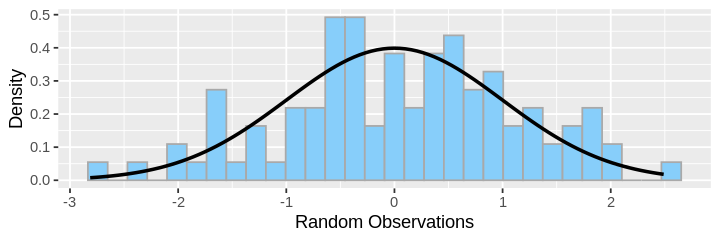

In [77]:
ggplot(data = sim, aes(x = x)) +
  geom_histogram(aes(y = after_stat(density)),
                 color="darkgrey",
                 fill = "lightskyblue", ) +
  labs(x = "Random Observations", y = "Density") +
  stat_function(fun = dnorm,
                args = list(mean = 0, sd = 1),
                linewidth = 1)

**Exercise:** Do the simulated data look normally distributed?

**Answer:** The simulated data looks approximately normal.

It's difficult to assess whether a set of values is normally distributed by comparing histograms with a visualisation of the model. To determine if our values here are normally distributed, let's compare their quantiles with the quantiles of the standard normal that we simulated from.

**Exercise:** Copy and paste the following code to generate a quantile-quantile plot:


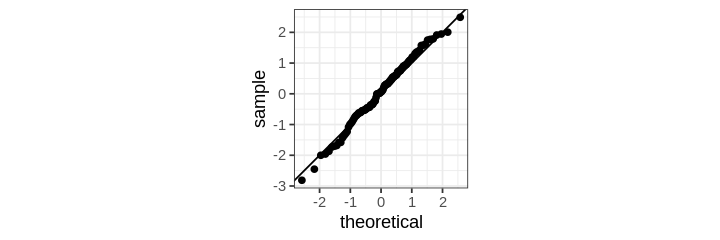

In [78]:
ggplot(data=sim, aes(sample=x)) +
  stat_qq() +
  geom_abline(intercept = 0, slope = 1) +
  theme_bw() +
  coord_equal()


We see that the points lie close to the diagonal line which represents that the quantiles are equal. The further from the diagonal line, the less normally distributed the values. We'll investigate this in further detail in coming weeks.

Now that we've looked at what the plot should look like, let's compare our observed heights to a standard normal distribution. The easiest way to do this is to *standardise* our data by subtracting its mean and then dividing by its standard deviation. In this way, the data have a mean of 0 and a standard deviation of 1 and does our standard normal distribution, $Z \sim N(0,1)$.


In [81]:
standardise <- function(x){
  return( (x-mean(x))/sd(x) )
}

**Exercise:** Copy and paste the above code into your script file and use it with `mutate(...,Height.std = standardise(Height))` to standardise your `Height` variable. Confirm that this new variable has a mean of 0 and standard deviation of 1.

**Answer:**

In [85]:
df <- mutate(df, Height.std = standardise(Height))
sd(df$Height.std)
mean(df$Height.std)

[1] 1

[1] 1.93959e-15

**Exercise:** Make a histogram of your standardised Height variable with a normal distribution with mean 0 and standard deviation of 1.

**Answer:**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


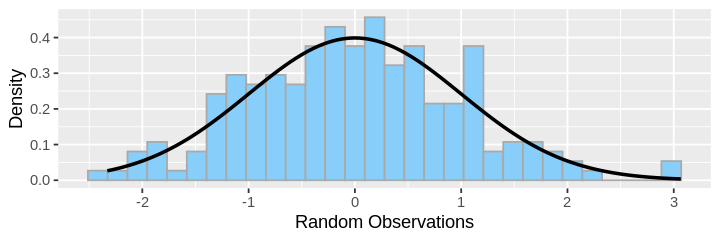

In [87]:
ggplot(data = df, aes(x = Height.std)) +
  geom_histogram(aes(y = after_stat(density)),
                 colour = 'darkgrey',
                 fill = 'lightskyblue') +
  stat_function(fun = dnorm,
                # args = list(mean = 0, sd = 1),
                linewidth = 1) +
  xlab("Random Observations") +
  ylab("Density")

**Exercise:** Modify the code from above to build a quantile-quantile plot of your standardised heights.

**Answer:**

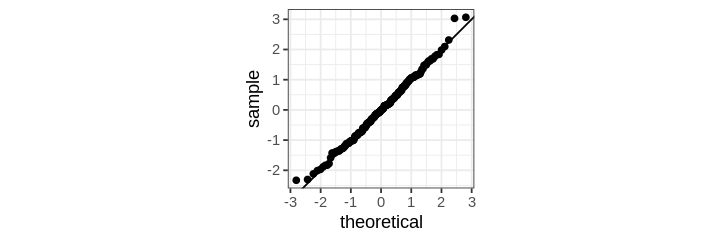

In [88]:
ggplot(data=df, aes(sample=Height.std)) +
  stat_qq() +
  geom_abline(intercept = 0, slope = 1) +
  theme_bw() +
  coord_equal()

**Exercise:**  If all the points fall on, or close to, the diagonal line then the observations are approximately normally distributed. Does the data appear to be normally distributed? Why or why not? Consider your histograms from earlier and the quantile-quantile plot above.

**Answer:** The data appears to be normally distributed as the points fall on or close to the line.

**Exercise:** Simulate $10^3, 10^4, 10^5$ and $10^6$ values from a $N(0,1)$ and plot their quantile-quantile plots. Discuss the variability you see.

**Answer:**

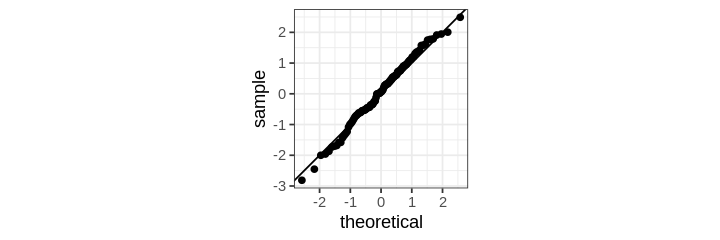

In [89]:
set.seed(113)
# n=10^2
sim <- data.frame(x = rnorm(n = 100))

ggplot(data=sim, aes(sample=x)) +
  stat_qq() +
  geom_abline(intercept = 0, slope = 1) +
  theme_bw() +
  coord_equal()

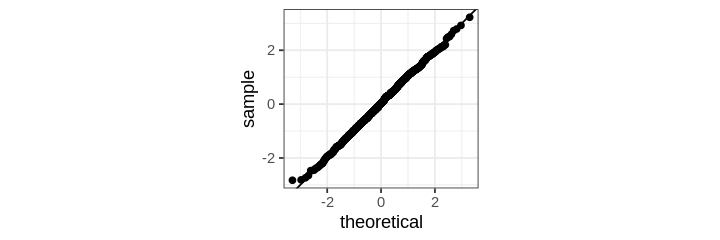

In [90]:
set.seed(113)
# n=10^3
sim <- data.frame(x = rnorm(n = 10^3))

ggplot(data=sim, aes(sample=x)) +
  stat_qq() +
  geom_abline(intercept = 0, slope = 1) +
  theme_bw() +
  coord_equal()

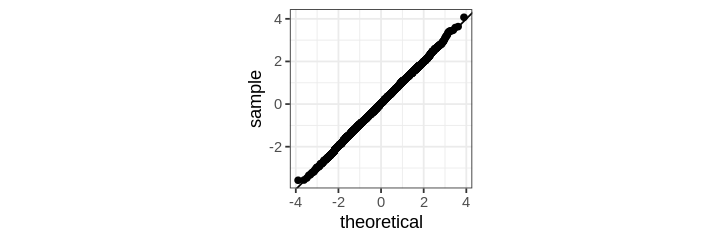

In [91]:
set.seed(113)
sim <- data.frame(x = rnorm(n = 10^4))

ggplot(data=sim, aes(sample=x)) +
  stat_qq() +
  geom_abline(intercept = 0, slope = 1) +
  theme_bw() +
  coord_equal()

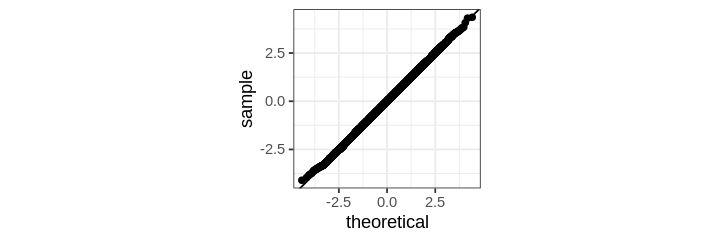

In [92]:
set.seed(113)
sim <- data.frame(x = rnorm(n = 10^5))

ggplot(data=sim, aes(sample=x)) +
  stat_qq() +
  geom_abline(intercept = 0, slope = 1) +
  theme_bw() +
  coord_equal()

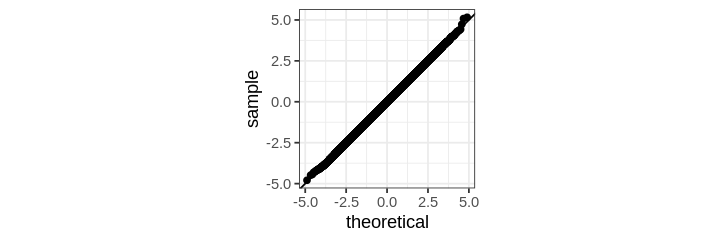

In [93]:
set.seed(113)
sim <- data.frame(x = rnorm(n = 10^6))

ggplot(data=sim, aes(sample=x)) +
  stat_qq() +
  geom_abline(intercept = 0, slope = 1) +
  theme_bw() +
  coord_equal()

More data on quantile-quantile plots can be found in Chapter 6 of *Mind on Statistics* and we will study these later in the semester to diagnose regression model performance.


# Summary

Today we focused on the use of the normal distribution as a probability model

As we will see next week, the t distribution looks like the normal distribution but seems to have more of the distribution out in the extremes of the tails. That is, the negative values are more negative than in a normal and the positive values are more positive than we would see in a normal.

# References

MacGillivray, Helen, Jessica Utts, and Robert Heckard. 2013. *Mind on Statistics.* 2nd Australian and New Zealand. Cengage Learning Australia.